In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np
from numpy import percentile

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # (opcional, si lo usás después)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Configuración de pandas
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 40)

In [2]:
# Cargar datos
df = pd.read_csv("default of credit card clients.csv")
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)

In [3]:
# Preprocesamiento
df = df.drop(columns=["ID"])
df = df.apply(pd.to_numeric, errors="coerce")
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"167,484.32",1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,"51,223.33","49,179.08","47,013.15","43,262.95","40,311.40","38,871.76","5,663.58","5,921.16","5,225.68","4,826.08","4,799.39","5,215.50",0.22
std,"129,747.66",0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,"73,635.86","71,173.77","69,349.39","64,332.86","60,797.16","59,554.11","16,563.28","23,040.87","17,606.96","15,666.16","15,278.31","17,777.47",0.42
min,"10,000.00",1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,"-165,580.00","-69,777.00","-157,264.00","-170,000.00","-81,334.00","-339,603.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"50,000.00",1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,"3,558.75","2,984.75","2,666.25","2,326.75","1,763.00","1,256.00","1,000.00",833.00,390.00,296.00,252.50,117.75,0.00
50%,"140,000.00",2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,"22,381.50","21,200.00","20,088.50","19,052.00","18,104.50","17,071.00","2,100.00","2,009.00","1,800.00","1,500.00","1,500.00","1,500.00",0.00
75%,"240,000.00",2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,"67,091.00","64,006.25","60,164.75","54,506.00","50,190.50","49,198.25","5,006.00","5,000.00","4,505.00","4,013.25","4,031.50","4,000.00",0.00
max,"1,000,000.00",2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,"964,511.00","983,931.00","1,664,089.00","891,586.00","927,171.00","961,664.00","873,552.00","1,684,259.00","896,040.00","621,000.00","426,529.00","528,666.00",1.00


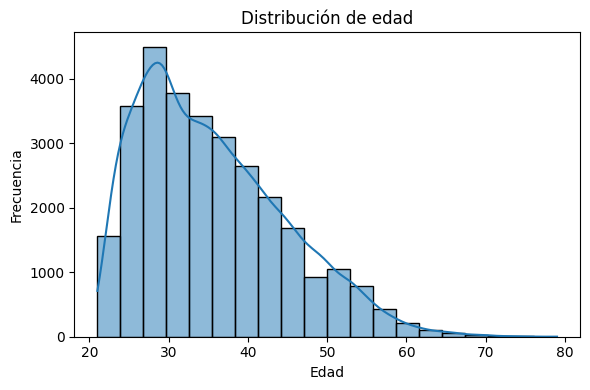

In [6]:
# Histograma de edad
plt.figure(figsize=(6, 4))
sns.histplot(df["AGE"], bins=20, kde=True)
plt.title("Distribución de edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("distribucion_edad.png")

## Se analizan los valores atipicos de la base de datos en la columna del cupo de la tarjeta de credito 

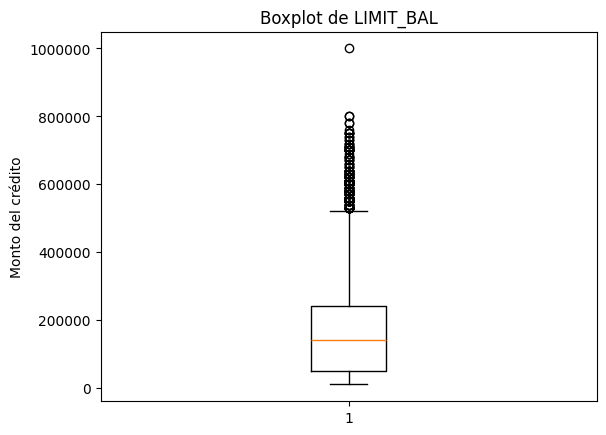

In [7]:
plt.ticklabel_format(style='plain', axis='both')
plt.boxplot(df['LIMIT_BAL'])
plt.title('Boxplot de LIMIT_BAL')
plt.ylabel('Monto del crédito')
plt.show()

### Se procede a utilizar el metodo IQR para eliminar los valores atipicos

In [8]:
p_25 = percentile(df['LIMIT_BAL'],25)
p_75 = percentile(df['LIMIT_BAL'],75)
rango_iqr = p_75 -p_25

print("Percentil: 25 :",p_25)
print("Percentil: 75 :",p_75)
print("Rango IQR :",rango_iqr)

Percentil: 25 : 50000.0
Percentil: 75 : 240000.0
Rango IQR : 190000.0


In [9]:
corte = rango_iqr *1.5
limite_inferior, limite_superior = p_25-corte,p_75+corte
print("Limite inferior=",limite_inferior)
print("Limite superior:",limite_superior)

Limite inferior= -235000.0
Limite superior: 525000.0


In [10]:
filas_ant = df.shape[0]

df = df.drop(df[df['LIMIT_BAL']>limite_superior].index)
df = df.drop(df[df['LIMIT_BAL']<limite_inferior].index)
filas_nuevas = df.shape[0]
print("Se eliminan {} filas".format(filas_ant-filas_nuevas))

Se eliminan 167 filas


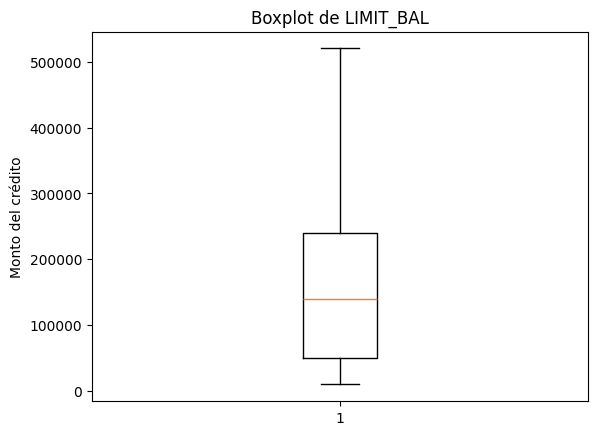

In [11]:
plt.ticklabel_format(style='plain', axis='both')
plt.boxplot(df['LIMIT_BAL'])
plt.title('Boxplot de LIMIT_BAL')
plt.ylabel('Monto del crédito')
plt.show()

## Se revisan los valores de variable "EDUCATION" segun la descripcion de la data

In [12]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

### Los niveles de educacion que se muestran en la descripcion, son 1=Graduado , 2=Estudiante Universitario, 3=Estudiante colegio o escuela, 4= Otros niveles superiores de educacion, por lo que agrupamos los valores que no estaban en la descripcion como "otros"(4)

In [13]:
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],4)

In [14]:
education_rank = df.groupby('EDUCATION')['default payment next month'].mean().sort_values()

print(education_rank)

EDUCATION
4   0.07
1   0.19
2   0.24
3   0.25
Name: default payment next month, dtype: float64


### El nivel de educacion podriamos considerarla una variable ordinal, se procede a asignarle el valor de 0 al 4, ya que "otros" a nivel de esta variable agrupan categorias superiores a "Graduados"

In [15]:
df['EDUCATION'] = df['EDUCATION'].replace(4,0)

## Se revisan los valores de variable "MARRIAGE" segun la descripcion de la data

In [16]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [17]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

In [18]:
df['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

# Se utiliza el metodo OneHotEncoder para las variables categoricas nominales

In [19]:
# Variables a codificar
columnas_nominales = ['SEX', 'MARRIAGE']

# Se reemplazan los valores en la columna para entender mejor en el DF
df['SEX'] = df['SEX'].replace({1:'MALE',2:'FEMALE'})
df['MARRIAGE'] = df['MARRIAGE'].replace({1:'MARRIED',2:'SINGLE',3:'OTHERS'})
# Se crea una copia para no modificar el original
df_encoded = df.copy()

In [20]:
# Inicializamos el codificador
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' evita multicolinealidad

# Ajustamos y transformamos las variables
encoded_array = encoder.fit_transform(df_encoded[columnas_nominales])

# Creamos nombres de columnas nuevas
encoded_cols = encoder.get_feature_names_out(columnas_nominales)

# Convertimos el resultado a un DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_encoded.index)

# Concatenamos con el DataFrame original (y quitamos las columnas originales)
df_encoded = pd.concat([df_encoded.drop(columns=columnas_nominales), encoded_df], axis=1)

In [21]:
df_encoded

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_MALE,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.00,0.00,0.00
1,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.00,0.00,1.00
2,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.00,0.00,1.00
3,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.00,0.00,0.00
4,50000,2,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,1.00,0.00,0.00
29996,150000,3,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,1.00,0.00,1.00
29997,30000,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,1.00,0.00,1.00
29998,80000,3,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,1.00,0.00,0.00


In [22]:
# Separar variables predictoras y objetivo
X = df_encoded.drop(columns=["default payment next month"])
y = df_encoded["default payment next month"]

In [23]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Diccionario de modelos a probar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


# Crear diccionario para almacenar resultados
resultados = {}

# Evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Guardar métricas en el diccionario
    resultados[nombre] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    }
    

# Crear DataFrame ordenado por F1-score
df_resultados = pd.DataFrame(resultados).T.sort_values(by="F1-score", ascending=False)



c:\Users\xbarc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\xbarc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:11:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
df_resultados

,Accuracy,Precision,Recall,F1-score
XGBoost,0.81,0.62,0.37,0.46
Random Forest,0.81,0.62,0.36,0.46
Decision Tree,0.72,0.37,0.41,0.39
Logistic Regression,0.80,0.65,0.25,0.36
KNN,0.75,0.37,0.18,0.24
SVM,0.78,0.00,0.00,0.00


## Se grafica las curvas ROC para ver las diferencias en los modelos y determinar los que tienen mejores metricas en cuanto a la evaluacion

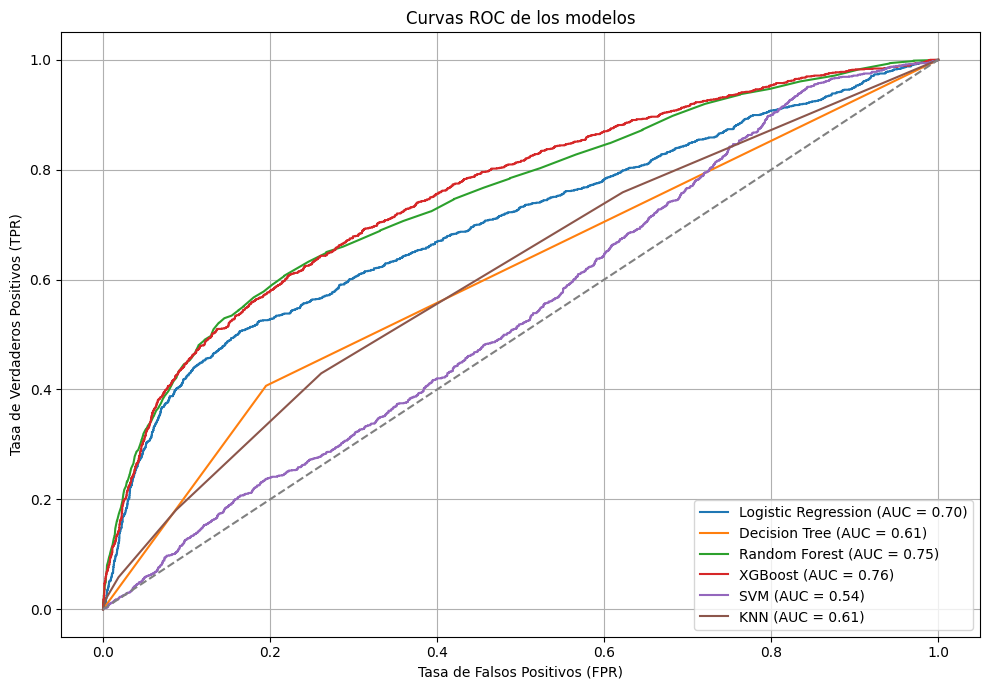

In [25]:
# Inicializar gráfico
plt.figure(figsize=(10, 7))

# Diccionario para guardar AUCs
auc_scores = {}

# Calcular curva ROC y AUC para cada modelo
for nombre, modelo in modelos.items():
    # Verificamos que el modelo tenga predict_proba
    if hasattr(modelo, "predict_proba"):
        y_scores = modelo.predict_proba(X_test)[:, 1]
    else:
        # Para SVM o modelos que no tienen predict_proba usamos decision_function
        y_scores = modelo.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    auc_scores[nombre] = roc_auc
    
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

# Línea base
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("Curvas ROC de los modelos")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Se utiliza gridsearch para optimizacion de hiperparametros para el modelo XGBOOST que fue el mejor modelo evaluado

In [26]:

# Definir el modelo base
xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# Crear el GridSearch con validación cruzada de 3 folds
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Ejecutar búsqueda
grid_search.fit(X_train, y_train)

# Ver mejores parámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Ver mejor puntaje F1
print(f"Mejor F1-score (cross-validated): {grid_search.best_score_:.4f}")

# Usar mejor modelo encontrado
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Mejor F1-score (cross-validated): 0.4870


c:\Users\xbarc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Se evalua nuevamente el modelo XGBOOST para ver los resultados

In [27]:

# Predicciones sobre test set
y_pred_xgb = best_xgb.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Evaluación del mejor modelo XGBoost (tras grid search):")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb, digits=4))

Evaluación del mejor modelo XGBoost (tras grid search):
Accuracy:  0.8148
Precision: 0.6481
Recall:    0.3605
F1-score:  0.4633

Matriz de Confusión:
[[4385  259]
 [ 846  477]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.8383    0.9442    0.8881      4644
           1     0.6481    0.3605    0.4633      1323

    accuracy                         0.8148      5967
   macro avg     0.7432    0.6524    0.6757      5967
weighted avg     0.7961    0.8148    0.7939      5967



## Visualizacion de la importancia de las variables en el modelo XGBOOST

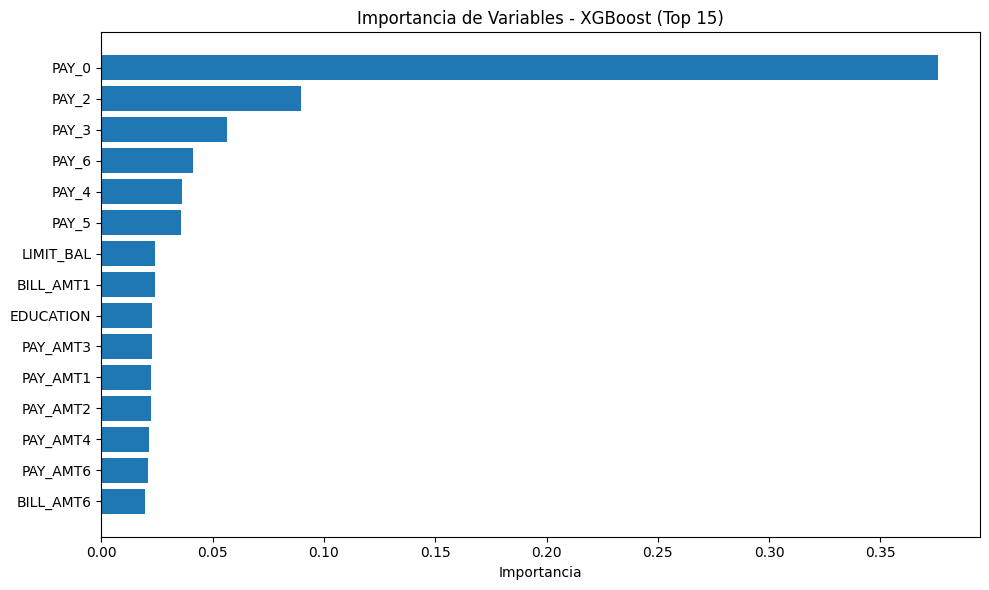

In [28]:
importances = best_xgb.feature_importances_

# Crear DataFrame con nombres de variables
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

top_n = 15
importancia_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(importancia_df.head(top_n)['Variable'][::-1], importancia_df.head(top_n)['Importancia'][::-1])
plt.title("Importancia de Variables - XGBoost (Top 15)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()
